In [ ]:
!pip install wfdb
!pip install py-ecg-detectors
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43817 sha256=fa766d1d7c71fa573c78fa5fe5adf742ec863e66a4bedee58929b1bd759832ef
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
from ecgdetectors import Detectors # desde https://pypi.org/project/py-ecg-detectors/
from hrv import HRV
from BaselineRemoval import BaselineRemoval
import seaborn as sns

Mounted at /content/drive


In [ ]:

with open('/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/arrythmias.txt') as t:
  arrythmias = t.readlines()
  for item in arrythmias:
    item.split(',')
    
print(arrythmias)

['100,PVC,25,13\n', '100,APC,26,9\n', '101,APC,9,54\n', '101,APC,24,32\n', '102,PVC,1,28\n', '102,PVC,9,35\n', '103,APC,19,15\n', '104,PVC,3,42\n', '105,PVC,7,57\n', '105,PVC,26,45\n', '106,PVC,4,23\n', '107,PVC,12,30\n', '107,PVC,19,54\n', '107,PVC,25,52\n', '109,PVC,1,28\n', '109,PVC,4,46\n', '109,PVC,14,01\n', '109,PVC,17,13\n', '109,PVC,19,21\n', '109,PVC,28,03\n', '109,PVC,29,10\n', '111,PVC,8,31\n', '112,APC,11,40\n', '114,PVC,1,20\n', '113,PVC,3,39\n', '\n', '\n']


In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/RECORDS') as f:
  lines = f.readlines()
print(lines)

with open('/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/arrythmias.txt') as t:
  arrythmias = t.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/"


for line in arrythmias:
  data_string = line.split(",")
  baseline_data = baseline + data_string[0]

  if data_string[0] == '\n':
    break
  try:
    minutes = int(data_string[2])
    time = minutes + int(data_string[3].split("/n")[0])
    sample_from = time * 360
    sample_to = time + (20*360)
    data[data_string[0]] = {}
    data[data_string[0]]["raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(data_string[0])

new_data = data
print(new_data)

['100\n', '101\n', '102\n', '103\n', '104\n', '105\n', '106\n', '107\n', '108\n', '109\n', '111\n', '112\n', '113\n', '114\n', '115\n', '116\n', '117\n', '118\n', '119\n', '121\n', '122\n', '123\n', '124\n', '200\n', '201\n', '202\n', '203\n', '205\n', '207\n', '208\n', '209\n', '210\n', '212\n', '213\n', '214\n', '215\n', '217\n', '219\n', '220\n', '221\n', '222\n', '223\n', '228\n', '230\n', '231\n', '232\n', '233\n', '234\n']
{}


In [ ]:
for item in new_data:
  wfdb.plot_wfdb(record = new_data[item]["raw_data"] , ecg_grids = [0])
  display(new_data[item]["raw_data"].__dict__)

In [ ]:
for item in new_data:
  dict_data = new_data[item]["raw_data"].__dict__
  new_data[item]["sex"] = dict_data['comments'][0].split(' ')[1]
  new_data[item]["age"] = dict_data['comments'][0].split(' ')[0]

new_data

{'100': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516a90>,
  'sex': 'M',
  'age': '69'},
 '101': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516670>,
  'sex': 'F',
  'age': '75'},
 '102': {'raw_data': <wfdb.io.record.Record at 0x7f6a025164c0>,
  'sex': 'F',
  'age': '84'},
 '103': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516760>,
  'sex': 'M',
  'age': '-1'},
 '104': {'raw_data': <wfdb.io.record.Record at 0x7f6a070ed550>,
  'sex': 'F',
  'age': '66'},
 '105': {'raw_data': <wfdb.io.record.Record at 0x7f6a39105be0>,
  'sex': 'F',
  'age': '73'},
 '106': {'raw_data': <wfdb.io.record.Record at 0x7f6a382df1f0>,
  'sex': 'F',
  'age': '24'},
 '107': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516520>,
  'sex': 'M',
  'age': '63'},
 '109': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516e20>,
  'sex': 'M',
  'age': '64'},
 '111': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516d00>,
  'sex': 'F',
  'age': '47'},
 '112': {'raw_data': <wfdb.io.record.Record at 0x7f6a0251613

In [ ]:
!pip install heartpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.6 MB/s eta 0:00:00


In [ ]:
import heartpy

In [ ]:
def baseline_filter(data):
  data_df = data.to_dataframe()
  # print(data_df)
  sos = signal.butter(5, 15, 'hp', fs=1000, output='sos')
  filtered_df = pd.DataFrame(signal.sosfilt(sos, data_df), columns = data_df.columns.to_list())
  base_Obj = BaselineRemoval(data_df["MLII"])
  b_rem_df=base_Obj.ZhangFit()
  return b_rem_df

def r_peak_detection(data):
  fs = 360 # Si la frecuencia de sampleo cambia, aqui lo modificamos
  detectors = Detectors(fs)
  r_peaks = (detectors.wqrs_detector(data))
  return r_peaks

def r_peak_cleanup(data,r_peaks_data):
  r_peaks_filter = r_peaks_data
  for i in range(len(r_peaks_filter)):
    try:
      if data[r_peaks_filter[i]] < 0.2:
        r_peaks_filter.pop(i)
    except:
      break
  return r_peaks_filter

def features(r_peaks_data, data_item):

  fs = 360 #cambia el sampling rate para arritmia
  hrv_class = HRV(fs)

  #tengo duda de qp con el heartrate

  heart_rate = HRV.HR(hrv_class, r_peaks_data)
  data_item["heart_rate_data"] = heart_rate
  data_item["heart_rate_std"] = heart_rate.std()
  heart_rate = heart_rate.mean()
  data_item["heart_rate"] = heart_rate
  

  data_item["nn20"] = HRV.NN20(hrv_class,r_peaks_data) #the number of pairs of successive NNs that differ by more than 20 ms.
  data_item["nn50"] = HRV.NN50(hrv_class,r_peaks_data) # the number of pairs of successive NNs that differ by more than 50 ms.
  data_item["pnn20"] = HRV.pNN20(hrv_class,r_peaks_data) # the proportion of NN20 divided by total number of NNs.
  data_item["pnn50"] = HRV.pNN50(hrv_class,r_peaks_data) # the proportion of NN50 divided by total number of NNs.
  data_item["rmssd"] = HRV.RMSSD(hrv_class,r_peaks_data) # (root mean square of successive differences).
  data_item["sdnn"]= HRV.SDNN(hrv_class,r_peaks_data) # the standard deviation of NN intervals.
  data_item["sdsd"] = HRV.SDSD(hrv_class,r_peaks_data) # Calculate SDSD (standard deviation of successive differences), the standard deviation of the successive differences between adjacent NNs.

  if heart_rate > 100 :
    data_item["tachycardia"] = 1
    data_item["bradycardia"] = 0
  elif heart_rate < 60:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 1
  else:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 0

  data_item["arrythmia"] = 1 #Esto es solo para el caso de healthy patients

final_data = new_data

for item in final_data:
  try:
    filtered_data = baseline_filter(final_data[item]["raw_data"])
    final_data[item]["filtered_data"] = filtered_data
    r_peaks_data = r_peak_detection(filtered_data)
    r_peaks_clean = r_peak_cleanup(filtered_data, r_peaks_data)
    final_data[item]["r_peaks"] = r_peaks_clean
    features (r_peaks_clean,final_data[item])
  except:
    pass

final_data

{'100': {'raw_data': <wfdb.io.record.Record at 0x7f6a02516a90>,
  'sex': 'M',
  'age': '69',
  'filtered_data': array([0.12901235, 0.13530247, 0.13159259, ..., 0.10511058, 0.11398205,
         0.11285352]),
  'r_peaks': [349,
   664,
   962,
   1241,
   1531,
   1823,
   2110,
   2411,
   2709,
   3007,
   3299,
   3581,
   3863,
   4155,
   4458,
   4757,
   5055,
   5347,
   5626,
   5913,
   6194,
   6480,
   6787,
   7092,
   7389,
   7672,
   7954,
   8237,
   8531,
   8823,
   9128,
   9429,
   9721,
   10003,
   10281,
   10564,
   10853,
   11156,
   11452,
   11745,
   12025,
   12311,
   12597,
   12884,
   13178,
   13486,
   13786,
   14070,
   14351,
   14637,
   14936,
   15232,
   15530,
   15830,
   16126,
   16413,
   16693,
   16979,
   17272,
   17582,
   17887,
   18179,
   18465,
   18748,
   19034,
   19326,
   19623,
   19927,
   20235,
   20526,
   20804,
   21090,
   21379,
   21674,
   21974,
   22270,
   22568,
   22855,
   23136,
   23416],
  'heart_rate_dat

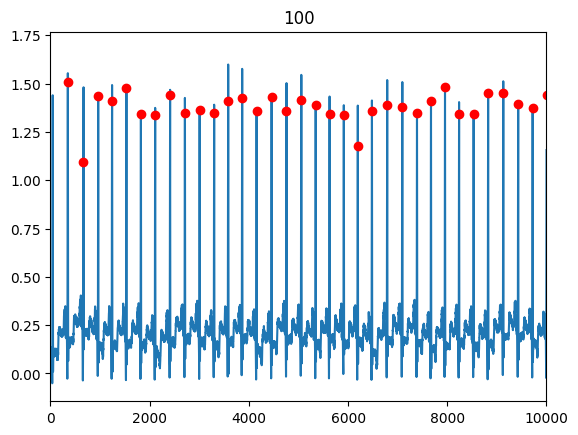

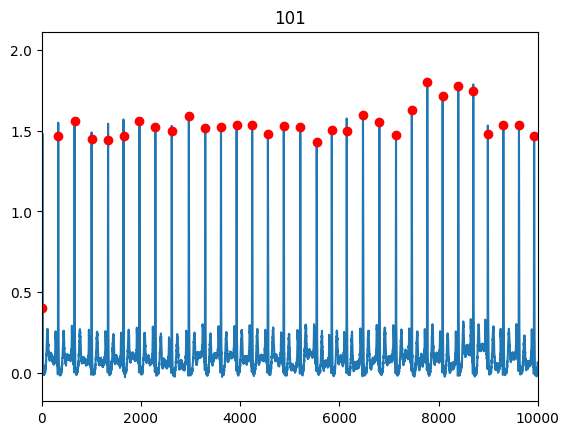

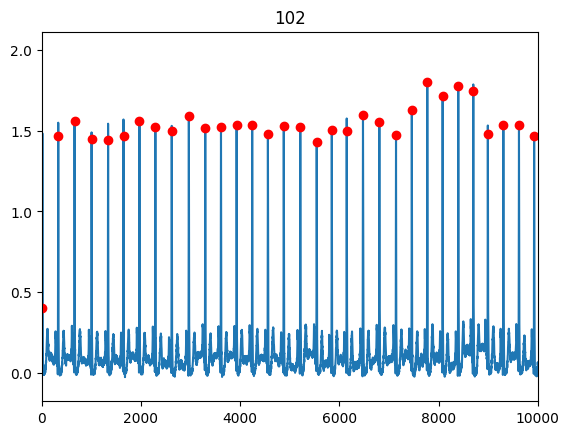

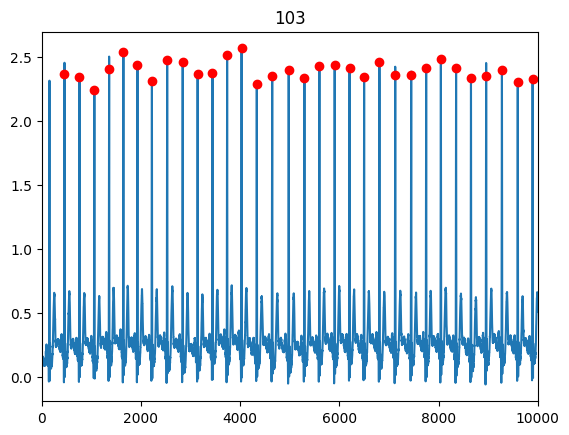

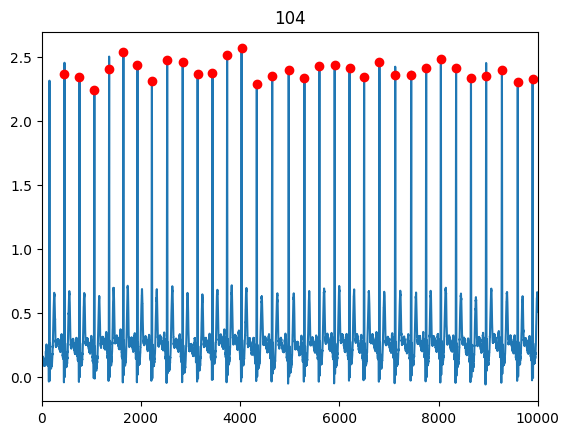

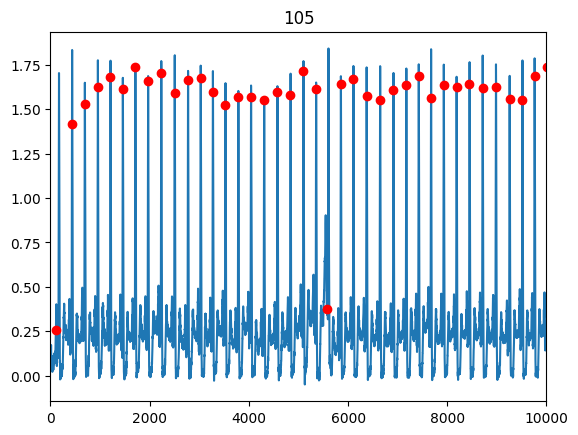

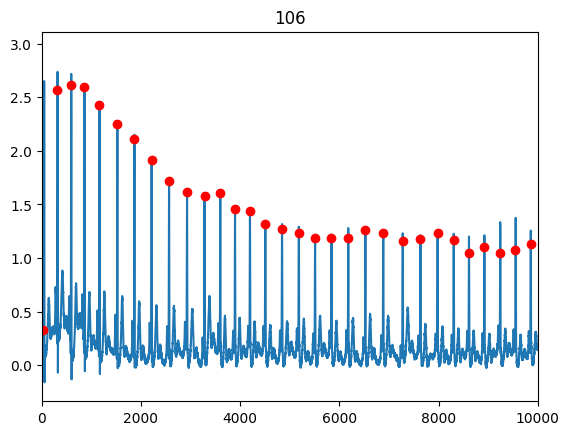

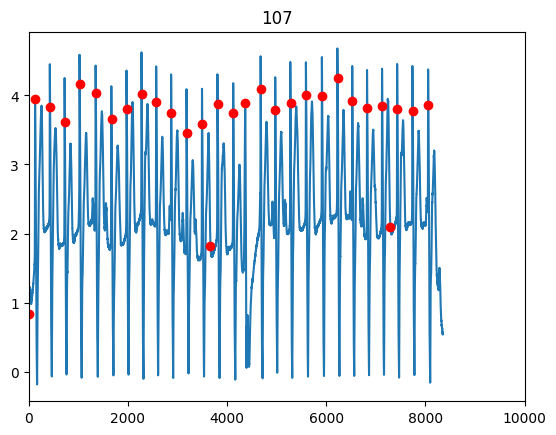

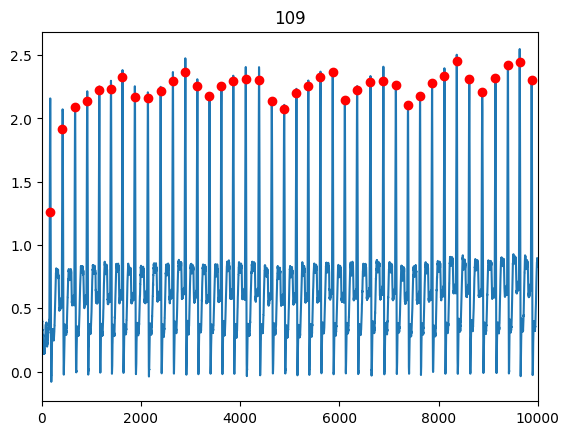

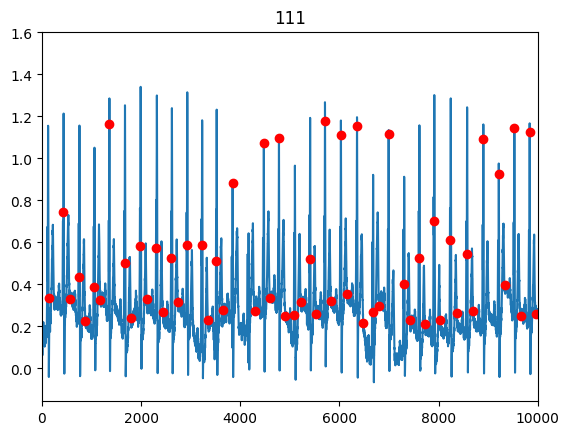

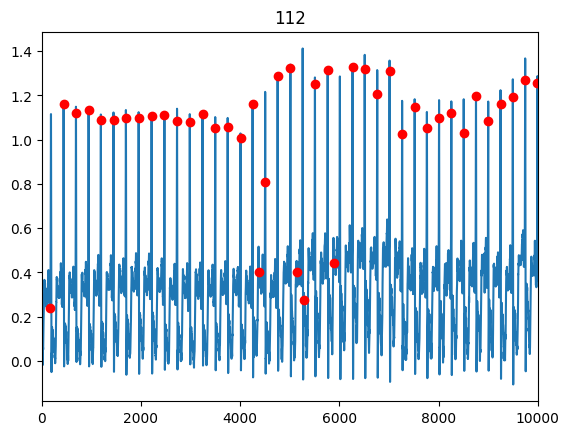

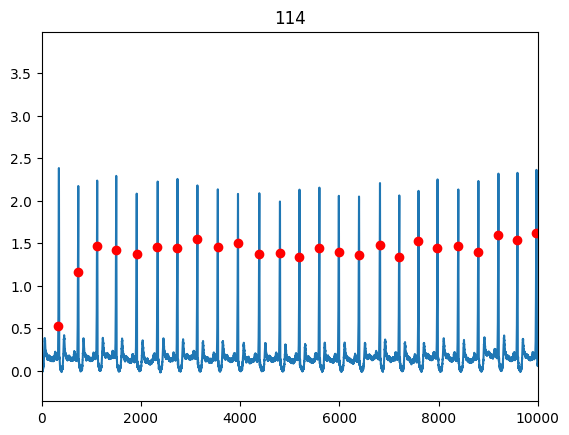

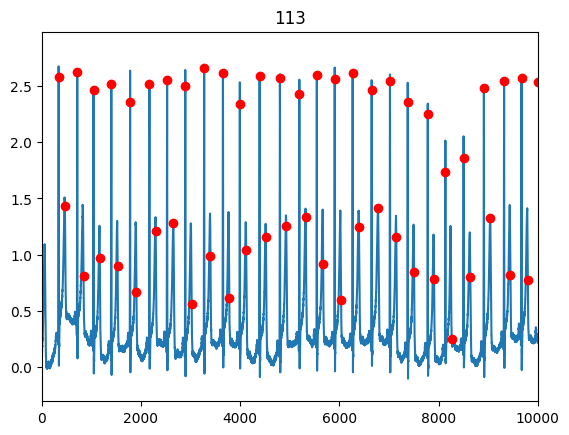

In [ ]:
for item in final_data:
  try:
    x = list(range(0, len(final_data[item]["filtered_data"])))
    r_peaks = final_data[item]["r_peaks"]
    data = final_data[item]["filtered_data"]
  except:
    pass
  #METODO PARA LIMPIAR MENORES A 0.2
  for i in range(len(r_peaks)):
    try:
      if data[r_peaks[i]] < 0.2:
        r_peaks.pop(i)
    except:
      break
  plt.figure()
  ax = plt.axes()
  plt.plot(x, data)
  plt.plot(r_peaks, data[r_peaks], 'ro')
  ax.set_xlim([0,10000])
  plt.title(item)
  plt.show()

In [ ]:
final_data_df_AR = pd.DataFrame.from_dict(final_data, orient = 'index')

final_data_df_AR = final_data_df_AR.join(pd.get_dummies(final_data_df_AR["sex"])).drop("sex", axis = 1)

In [ ]:
final_data_df_AR.rename(columns = {'F':'female', 'M': 'male'}, inplace = True)
final_data_df_AR

,raw_data,age,filtered_data,r_peaks,heart_rate_data,heart_rate_std,heart_rate,nn20,nn50,pnn20,pnn50,rmssd,sdnn,sdsd,tachycardia,bradycardia,arrythmia,female,male
100,<wfdb.io.record.Record object at 0x7f6a02516a90>,69,"[0.12901235065894584, 0.13530247133911683, 0.1...","[349, 664, 962, 1241, 1531, 1823, 2110, 2411, ...","[68.57142857142857, 72.48322147651007, 77.4193...",2.197749,74.041551,29.0,2.0,0.367089,0.025316,24.144511,24.274493,24.112317,0.0,0.0,1.0,0,1
101,<wfdb.io.record.Record object at 0x7f6a02516670>,75,"[0.05208925877849152, 0.05761015119002427, 0.0...","[8, 334, 662, 1006, 1339, 1649, 1970, 2291, 26...","[66.25766871165644, 65.85365853658537, 62.7906...",2.801649,68.712543,22.0,4.0,0.440000,0.080000,31.195625,35.938219,31.188207,0.0,0.0,1.0,1,0
102,<wfdb.io.record.Record object at 0x7f6a025164c0>,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
103,<wfdb.io.record.Record object at 0x7f6a02516760>,-1,"[0.10437899934544989, 0.10042277585166756, 0.0...","[458, 761, 1060, 1358, 1646, 1930, 2221, 2529,...","[65.45454545454545, 71.2871287128713, 72.24080...",2.496700,70.925716,33.0,7.0,0.428571,0.090909,29.998917,29.876577,29.986089,0.0,0.0,1.0,0,1
104,<wfdb.io.record.Record object at 0x7f6a070ed550>,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
105,<wfdb.io.record.Record object at 0x7f6a39105be0>,73,"[0.09156445987520315, 0.08248010125930436, 0.0...","[110, 433, 691, 954, 1209, 1458, 1711, 1968, 2...","[66.87306501547987, 83.72093023255813, 82.1292...",4.557422,83.176779,17.0,5.0,0.435897,0.128205,51.691263,41.032071,51.485709,0.0,0.0,1.0,1,0
106,<wfdb.io.record.Record object at 0x7f6a382df1f0>,24,"[0.26598901562473987, 0.28364890433131884, 0.3...","[18, 317, 594, 862, 1164, 1524, 1868, 2215, 25...","[72.24080267558529, 77.9783393501805, 80.59701...",40.885801,92.002316,76.0,54.0,0.808511,0.574468,324.065455,274.135768,324.024731,0.0,0.0,1.0,1,0
107,<wfdb.io.record.Record object at 0x7f6a02516520>,63,"[0.7844335863743165, 0.7922750830085065, 0.810...","[4, 131, 434, 732, 1032, 1355, 1673, 1980, 228...","[170.0787401574803, 71.2871287128713, 72.48322...",29.509803,84.187371,17.0,11.0,0.586207,0.379310,200.370303,170.060245,199.500392,0.0,0.0,1.0,0,1
109,<wfdb.io.record.Record object at 0x7f6a02516e20>,64,"[0.4271613712614778, 0.42643298154095505, 0.41...","[162, 418, 671, 915, 1159, 1394, 1627, 1875, 2...","[84.375, 85.37549407114625, 88.52459016393442,...",4.752573,86.067139,44.0,8.0,0.511628,0.093023,57.308932,38.959019,57.308597,0.0,0.0,1.0,0,1
111,<wfdb.io.record.Record object at 0x7f6a02516d00>,47,"[0.08878849951212253, 0.08467637473075168, 0.0...","[135, 434, 561, 751, 878, 1052, 1179, 1360, 16...","[72.24080267558529, 170.0787401574803, 113.684...",34.110215,135.225711,125.0,125.0,0.992063,0.992063,240.473042,147.807353,240.460618,1.0,0.0,1.0,1,0


In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/Shareddrives/Proyecto Final/Progra/arrythmia_corregida(TEST).csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

final_data_df_AR.to_csv(filepath)
# final_data_df.to_excel(filepath)